In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Stock and date settings
stock = "TSLA"  # Try changing this to other stocks like "AAPL" or "GOOG"
start = "2010-01-01"
end = "2025-01-01"

# Get stock data
data = yf.download(stock, start=start, end=end)

print(data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [11]:
# Calculate moving averages
data['SMA50'] = data['Close'].rolling(50).mean()  # 50-day average
data['SMA200'] = data['Close'].rolling(200).mean() # 200-day average

# Create trading signals
data['Signal'] = 0  # Start with no signal
data.loc[data['SMA50'] > data['SMA200'], 'Signal'] = 1   # Buy signal
data.loc[data['SMA50'] < data['SMA200'], 'Signal'] = -1  # Sell signal

In [12]:
# Calculate returns
data['Position'] = data['Signal'].shift(1)  # Previous day's signal
data['Daily Return'] = data['Close'].pct_change()  # Daily price changes
data['Strategy Return'] = data['Position'] * data['Daily Return']

# Calculate growth of $1 investments
data['Market Growth'] = (1 + data['Daily Return']).cumprod()
data['Strategy Growth'] = (1 + data['Strategy Return']).cumprod()

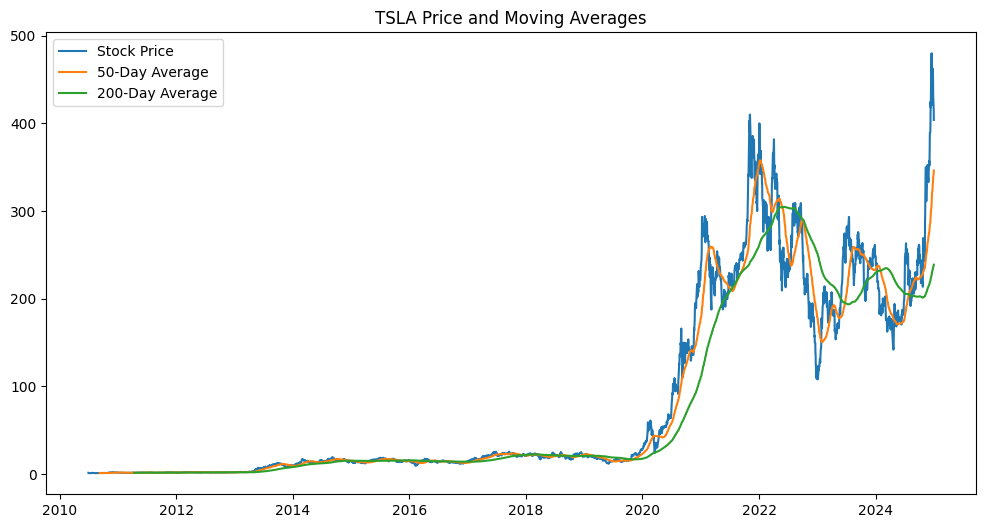

In [13]:
# Plot price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Stock Price')
plt.plot(data['SMA50'], label='50-Day Average')
plt.plot(data['SMA200'], label='200-Day Average')
plt.title(f"{stock} Price and Moving Averages")
plt.legend()
plt.show()

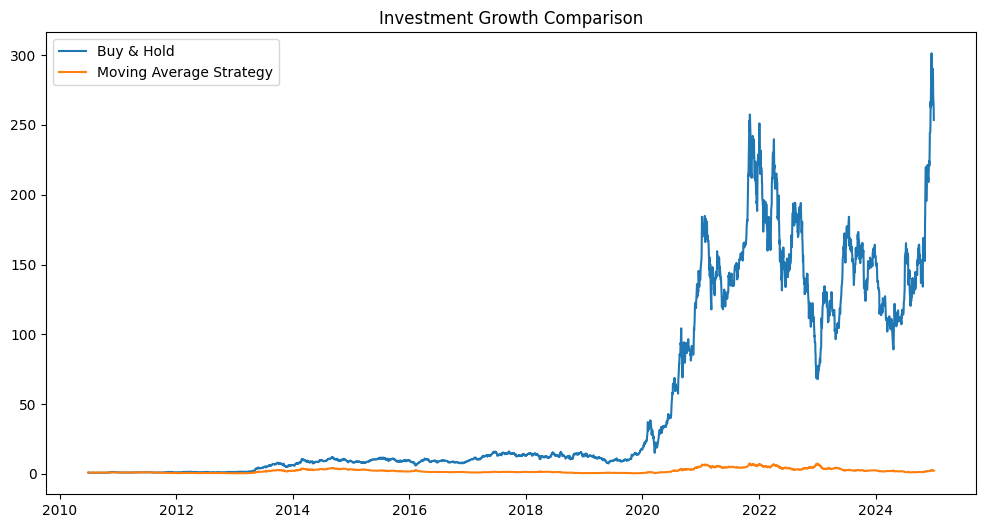

In [14]:
# Plot investment growth
plt.figure(figsize=(12, 6))
plt.plot(data['Market Growth'], label='Buy & Hold')
plt.plot(data['Strategy Growth'], label='Moving Average Strategy')
plt.title("Investment Growth Comparison")
plt.legend()
plt.show()


In [15]:
# Print final results
market_result = data['Market Growth'].iloc[-1] - 1
strategy_result = data['Strategy Growth'].iloc[-1] - 1

print(f"Buy & Hold Return: {market_result:.1%}")
print(f"Strategy Return: {strategy_result:.1%}")

Buy & Hold Return: 25256.2%
Strategy Return: 131.6%
